In [1]:
# First we import the module and start up the Matlab interpreter

import os
import numpy as np
from pace_neutrons import Matlab
m = Matlab()

# Note that every Matlab command (including all Horace and SpinW commands)
# must be called as a method of the Matlab `m` object.
# For example, to calculate the eigenvalues of a 3x3 "magic" square matrix in Matlab:
em = m.eig(m.magic(3))
print(em)

# Also we switch on the parallel processing capabilities of Horace
m.hpc('on')
m.hpc_config().parallel_cluster = 'herbert'
m.hpc_config().combine_sqw_using = 'mpi_code'
m.hpc_config().build_sqw_in_parallel = True

Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config
> In herbert_config (line 3)


!==================================================================!

!                   of neutron spectroscopy data                   !
!                          Herbert 4.0.0                           !
!------------------------------------------------------------------!

All features have moved to hor_config

!==================================================================!
!                           Horace 4.0.0                           !

!-----

----

We now run a GUI tool call `horace_planner` which can be used to plan an experiment

You can get help on it from here:

https://pace-neutrons.github.io/Horace/unstable/manual/Planning_a_Horace_scan.html

In [2]:
%matlab_plot_mode windowed
m.horace_planner()


----

As an alternative, you can use the `dummy_sqw` command to generate a full SQW dataset and use the normal Horace plot and cut commands to view what your data would look like.

Help can be obtained here:

https://pace-neutrons.github.io/Horace/unstable/manual/Planning_a_Horace_scan.html#more-detailed-planning-of-scans

In [3]:
output_data_folder = '/tmp/'  # Or you home folder
instrument_folder = '/mnt/ceph-training/course_materials/horace_instrument_files'

# Name and folder for output "fake" generated file
sqw_file = os.path.join(output_data_folder, 'my_dummy_file.sqw')

# Instrument parameter file (may be in another location to this)
par_file = os.path.join(instrument_folder, 'MAPS_4to1_102.par')

# In this case we want to simulate a measurement of bcc-Iron, which has lattice
# parameter 2.87 Angstrom, and the crystal was mounted in the H-K scattering plane
# We will be using an incident energy of 400 meV

# u and v vectors to define the crystal orientation 
# (u||ki, uv plane is horizontal but v does not need to be perp to u.
# See: https://pace-neutrons.github.io/Horace/unstable/user_guide/Getting_started.html#example
# For an image of the coordinate system used by Horace
u = [1, 0, 0]
v = [0, 1, 0]

# Range of rotation (psi) angles to cover in simulated dataset.
# (psi=0 when u||ki)
psi = range(0, 90, 5)

# Incident energy in meV
efix = 400
emode = 1    # This is for direct geometry (set to 2 for indirect)

# Range of energy transfer (in meV) for the dataset to cover
en = range(0, 390, 5)

# Sample lattice parameters (in Angstrom) and angles (in degrees)
alatt = [2.87, 2.87, 2.87]
angdeg = [90, 90, 90]

# Sample misalignment angles ("gonios"). [More details in session 4].
omega=0; dpsi=0; gl=0; gs=0;

# This runs the command to generate the "fake" dataset.
m.dummy_sqw (en, par_file, sqw_file, efix, emode, alatt, angdeg,
            u, v, psi, omega, dpsi, gl, gs)

Loading .par file with 36864 detectors : /mnt/ceph-training/course_materials/horace_instrument_files/MAPS_4to1_102.par

ASCIIPAR_LOADER:load_ascii_par::loaded 36864 detector(s)

--------------------------------------------------------------------------------
Creating output sqw file:
--------------------------------------------------------------------------------

Calculating projections...

Time to read spe and detector data:

Elapsed time is 0.030685 seconds
    CPU time is 0.06 seconds
 

Time to convert from spe to sqw data:
Elapsed time is 0.27836 seconds

*** Completed cat_pixels using 1 pages in 0.15761 sec.

*** Writing to: /tmp/dummy.tmp...

--------------------------------------------------------------------------------
Creating intermediate .tmp file 2 of 18:
 

Calculating projections...

Time to read spe and detector data:

Elapsed time is 0.025406 seconds

Time to convert from spe to sqw data:

*** Completed cat_pixels using 1 pages in 0.11816 sec.

*** Writing to: /tmp/d

['/tmp/dummy.tmp',
 '/tmp/dummy_2.tmp',
 '/tmp/dummy_3.tmp',
 '/tmp/dummy_4.tmp',
 '/tmp/dummy_5.tmp',
 '/tmp/dummy_6.tmp',
 '/tmp/dummy_7.tmp',
 '/tmp/dummy_8.tmp',
 '/tmp/dummy_9.tmp',
 '/tmp/dummy_10.tmp',
 '/tmp/dummy_11.tmp',
 '/tmp/dummy_12.tmp',
 '/tmp/dummy_13.tmp',
 '/tmp/dummy_14.tmp',
 '/tmp/dummy_15.tmp',
 '/tmp/dummy_16.tmp',
 '/tmp/dummy_17.tmp',
 '/tmp/dummy_18.tmp']

In [4]:
# =========================================================================
# Once generated, you can use standard Horace plotting tools to explore 
# this fake dataset, where the colour scale corresponds to the value of psi
# that contributed data to a given region of reciprocal space					 

sqw_file = os.path.join(output_data_folder, 'my_dummy_file.sqw')

# First define a view projection specified by two vectors, u and v.
# (Note that these u and v do not need to be the same as the sample u and v above.
# They just define the first, second and third axes for making a cut 
# (third axis w is implicit being perpendicular to the plane defined by u and v).
u = [1, 0, 0]
v = [0, 1, 0]

# We also define a coordinate offset (the 4th offset coordinate is energy transfer)
offset = [0, 0, 0, 0]

# We also define the Q (momentum) units for each axis which can be either
# 'r' for r.l.u. or 'a' for absolute (A^-1). This is defined for each u, v, w direction.
# E.g. 'rar' means u and w are normalissed to in r.l.u, and v in A^-1.
projtype = 'rrr'

proj = m.line_proj(u, v, 'offset', offset, 'type', projtype)

# You can also use the more Pythonic:
#proj = m.line_proj(u, v, offset=offset, type=projtype)

# Now make a cut of the fake dataset.
# The four vectors indicate either the range and step (three-vector) or
# the integration range (2-vector), with units defined by the proj.type
# The following makes a 3D volume cut with axes u, v and energy 
# (first, second and fourth vectors are 3-vectors), 
# integrating over w between -0.1 and 0.1.
# '-nopix' indicates to discard the pixel information and create
# a dnd (d3d) object.
my_vol = m.cut_sqw(sqw_file, proj, [-6,0.02,6], [-6,0.02,6],
                   [-0.1, 0.1], [0,5,390], '-nopix')

%matlab_plot_mode windowed

# Plot the 3D cut - click on the graph to plot 2D projections of the volume
m.plot(m.compact(my_vol))
# Could also use:
# my_vol.compact().plot()
# m.compact(my_vol).plot()

*** Step 1 of 2; Read data for 10414134 pixels -- processing data...
 ----->  included   4307896 pixels

*** Step 2 of 2; Read data for  5667534 pixels -- processing data...
 ----->  included   2674116 pixels



*** Step 1 of 1; Read data for  3096132 pixels -- processing data...
 ----->  included    174274 pixels

*** Step 1 of 1; Read data for  3096132 pixels -- processing data...
 ----->  included    180614 pixels

*** Step 1 of 1; Read data for   970107 pixels -- processing data...
 ----->  included     83533 pixels

*** Step 1 of 1; Read data for   390590 pixels -- processing data...
 ----->  included     13918 pixels



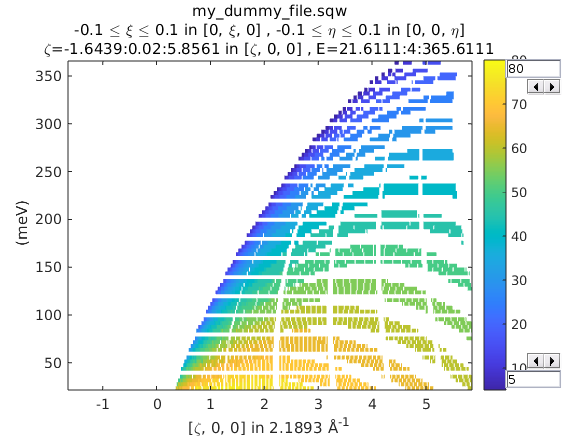

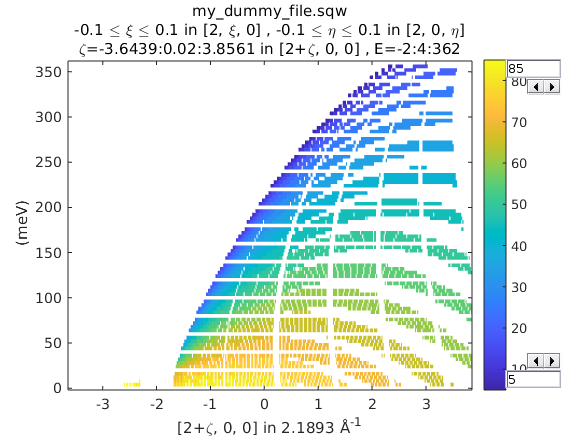

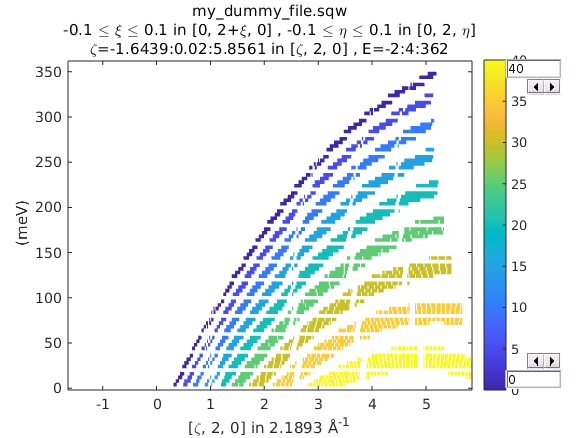

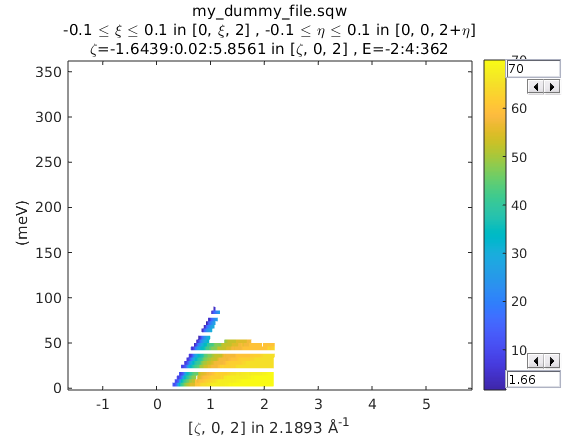

In [5]:
%matlab_plot_mode inline

# The following makes a 2D cut with axes u and energy (first and fourth
# vectors are 3-vectors), integrating over v and w between -0.1 and 0.1
my_cut = m.cut_sqw(sqw_file, proj, [0.02], [-0.1,0.1], [-0.1,0.1], [4], '-nopix')

# Now plot the 2D cut.
m.plot(my_cut)
m.keep_figure()

# Now make a set of three figures, plotting the dispersion along the [H00] direction
# but centered on (200), (020), and (002) in turn. Use keep_figure after each figure.
proj = m.line_proj([1,0,0], [0,1,0], 'offset', [2,0,0,0], 'type', 'rrr')
m.plot(m.cut_sqw(sqw_file, proj, [0.02], [-0.1,0.1], [-0.1,0.1], [0,4,360], '-nopix'))
m.keep_figure();

proj = m.line_proj([1,0,0], [0,1,0], 'offset', [0,2,0,0], 'type', 'rrr')
m.plot(m.cut_sqw(sqw_file, proj, [0.02], [-0.1,0.1], [-0.1,0.1], [0,4,360], '-nopix'))
m.keep_figure();

proj = m.line_proj([1,0,0], [0,1,0], 'offset', [0,0,2,0], 'type', 'rrr')
m.plot(m.cut_sqw(sqw_file, proj, [0.02], [-0.1,0.1], [-0.1,0.1], [0,4,360], '-nopix'))
m.keep_figure();

*** Step 1 of 1; Read data for  4529273 pixels -- processing data...
 ----->  included     65946 pixels



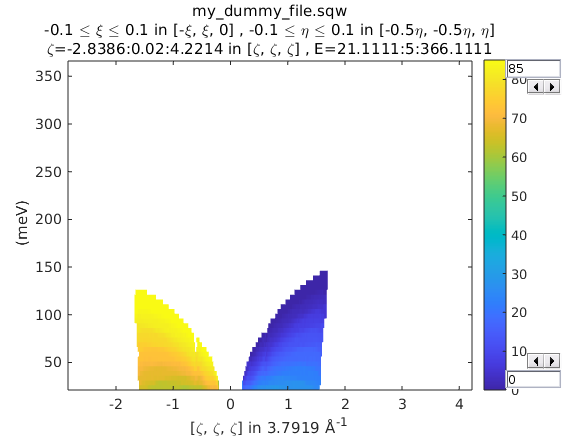

In [6]:
# Now make a 2D slice along [HHH] centred at (200)
proj = m.line_proj([1,1,1], [-1,1,0], 'type', 'rrr')
m.plot(m.cut_sqw(sqw_file, proj, [0.02], [-0.1, 0.1], [-0.1, 0.1], [5], '-nopix'))

----

In the next part we will create an SQW dataset from a crystal rotation measurement of bcc-Iron on MAPS.

The lattice parameter is 2.87 Angstrom, and the crystal was mounted in the [HK0] scattering plane.

`Ei=400` was used, and there are 46 datafiles covering the range 0 to 90 degrees in scattering angle (with 0 being the [H00] direction) in 2 degree steps.

In [7]:
output_data_folder = '/tmp/'  # Or you home folder
data_path = '/mnt/ceph-training/course_materials/horace_datafiles'

# Name of output sqw file (for the 4D combined dataset)
sqw_file = os.path.join(output_data_folder, 'iron.sqw')

# Instrument parameter file name (only needed for spe files - nxspe files
# have the par file embedded in them).
par_file = ''

# u and v vectors to define the crystal orientation 
# (u||ki when psi=0; uv plane is horizontal but v does not need to be perp to u).
u = [1, 0, 0] 
v = [0, 1, 0]

# Range of rotation (psi) angles of the data files.
# (psi=0 when u||ki)
psi = range(0, 91, 2)

# Data file run number corresponding to the psi angles declared above
# (must be the same size and order as psi)
runno = range(15052, 15098)

# Ensure that we have the parallised SQW generation switched on
m.hpc('on')
m.hpc_config().parallel_cluster = 'herbert'
m.hpc_config().combine_sqw_using = 'mpi_code'
m.hpc_config().build_sqw_in_parallel = True

# Incident energy in meV
efix = 400
emode = 1   # This is for direct geometry (set to 2 for indirect)

# Sample lattice parameters (in Angstrom) and angles (in degrees)
alatt = [2.87, 2.87, 2.87];
angdeg = [90, 90, 90];

# Sample misalignment angles ("gonios"). [More details in session 4].
omega=0; dpsi=0; gl=0; gs=0;

# Construct the data file names from the run numbers (the data file names
# are actually what is required by the gen_sqw function below, but we
# use the numbers as a convenience. This assumes that the data file names
# follow the standard convention of IIInnnnnn_eiEEE.nxspe, where III is
# the instrument abbreviation (MAP, MER or LET), nnnnnn is the run number
# and EEE is the incident energy.
efix_for_name = 400;
spefile = [f'{data_path}/map{runno[ii]}_ei{efix_for_name}.nxspe' for ii in range(len(psi))]

# Now run the function to generate the sqw file. This will take ~5 min
#m.gen_sqw(spefile, par_file, sqw_file, efix, emode, alatt, angdeg, u, v, psi, omega, dpsi, gl, gs)


*** Constructing 46 rundata objects

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
--------------------------------------------------------------------------------
Calculating limits of data for 46 spe files...

Time to compute limits:

**** Waiting for parallel cluster: ClusterHerbert to start

.
.

**** Parallel cluster "ClusterHerbert" is ready to execute tasks

**** starting parallel task: gen_sqw_iron_678250053

***Job : gen_sqw_iron_678250053 : state:  started |

***Job : gen_sqw_iron_678250053 : state:  running |Step#1.00/23, Estimated time left: 1.65(min)| 

***Job : gen_sqw_iron_678250053 : state:  running |Step#3.00/23, Estimated time left: 1.05(min)| 

***Job : gen_sqw_iron_678250053 : state:  running |Step#4.00/23, Estimated time left: 0.93(min)| 

***Job : gen_sqw_iron_678250053 : state:  running |Step#6.00/23, Estimated time left: 0.77(min)| 

***Job : gen_sqw_iron_678250053 : state:  running |Step#8.00/23, Estimated time left

******************************************************
:herbert configured: *** Starting Herbert (poor-man-MPI) cluster with 2 workers ***



Now make cuts of the data. E.g.

* A 3D plot with Q axes along [HH0] and [-H,H,0] and E. 
* A 2D Q-E cut along the [HH0] direction
* A set of 1D cuts along [HH0] integrating over different energy transfer ranges from [50,70], [70,90], [90,110], [110,130] meV. 

In [8]:
%matlab_plot_mode inline

# Now make a cut and plot it
proj = m.line_proj([1,0,0], [0,1,0], 'type', 'rrr')
w1 = m.cut_sqw(sqw_file, proj, [0.02], [0.02], [-0.1,0.1], [5]);
hf = w1.plot()
#m.uiwait(hf)

*** Step 1 of 2; Read data for 10414134 pixels -- processing data...
 ----->  retained   4077511 pixels

*** Step 2 of 2; Read data for  5667534 pixels -- processing data...
 ----->  retained   1759442 pixels

*** Completed cat_pixels using 1 pages in 0.3315 sec.



### Accumulating data to an existing sqw file

The above `gen_sqw` command generates an sqw file from the list of input `spe` or `nxspe` files in one go, and deletes all temporary files after it finishes. If you are in the middle of a rotation scan, you can use `accumulate_sqw` which does not delete the temporary files and so can append newly processed `spe`/`nxspe` files to an existing sqw file.

This may save some time in processing, but is not now generally recommended since the implementation of parallelisation in `gen_sqw` has made `gen_sqw` much faster. This is because `accumulate_sqw` needs to know _all_ the *psi* values (including those not yet measured) in order to construct the coarse data grid that enables Horace to make fast cuts. If you then include measurements at *psi* values not in the original list, then it is possible that some data will lie outside this grid and it will be 'lost' to the sqw file. If the additional runs are ones that interleave between the original files, this will not be a problem, but if the additional runs extend the original angular range, then you must use the 'clean' option which is equivalent to running `gen_sqw`.

In addition, if any of the temporary `tmp` corresponding to each `spe`/`nxspe` file are corrupted then `accumulate_sqw` will fail and you must then either delete the corrupted `tmp` file or use the 'clean' option.

The syntax for accumulate_sqw is very similar to gen_sqw:

```
m.accumulate_sqw(spefile, par_file, sqw_file, efix, emode, alatt, angdeg,
                 u, v, psi, omega, dpsi, gl, gs)
```

Or:

```
m.accumulate_sqw(spefile, par_file, sqw_file, efix, emode, alatt, angdeg,
                  u, v, psi, omega, dpsi, gl, gs, 'clean')
```

This is a way of appending newly processed spe files to an existing dataset. The key point is that the `psi` and `spe_file` arrays contain a list of *planned* files and run-numbers - only those that actually exist will be included in the file.

You can run this periodically, for example overnight.

*** Step 1 of 1; Read data for  1124172 pixels -- processing data...
 ----->  retained    353628 pixels

*** Completed cat_pixels using 1 pages in 0.027012 sec.



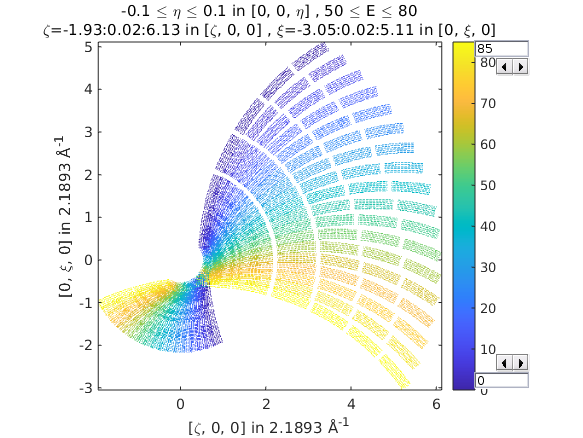

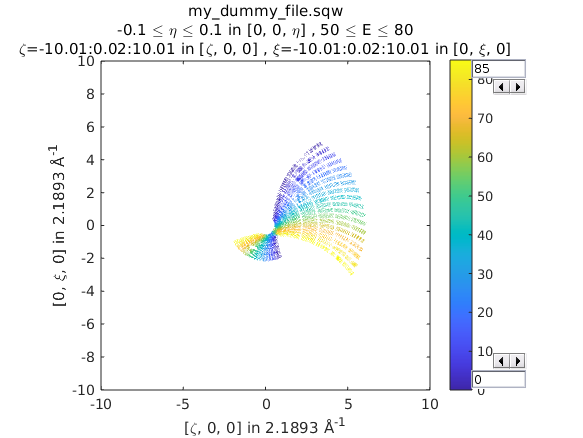

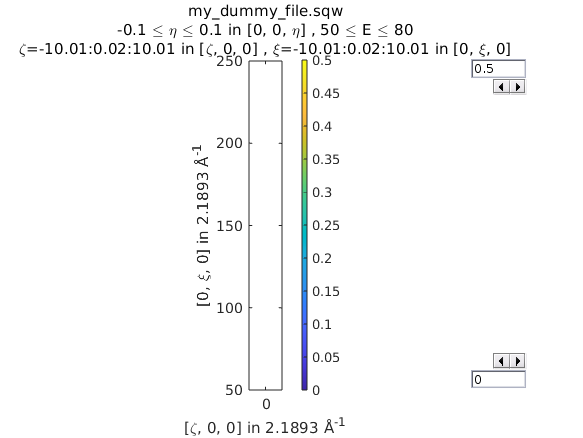

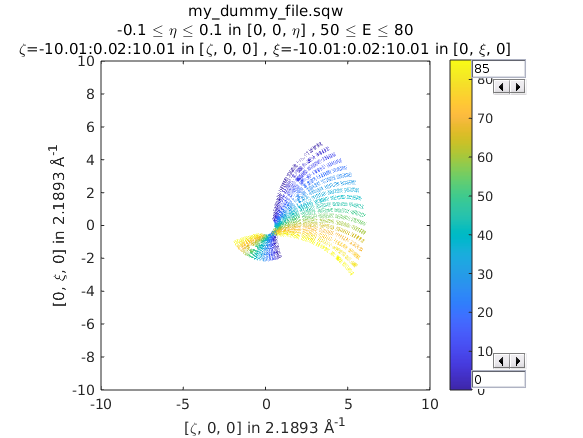

In [9]:
# =========================================================================
#                     Basic customisation of plots
# =========================================================================

%matlab_plot_mode inline

proj = m.line_proj([1,0,0], [0,1,0], 'type', 'rrr')
my_slice = m.cut_sqw(sqw_file, proj, [-10,0.02,10], [-10,0.02,10], [-0.1,0.1], [50,80]);

# Make axes tight:
m.plot(m.compact(my_slice));
m.keep_figure()

# Smoothing:
#m.plot(m.smooth(my_slice))   # this gives an error - think about why!

m.plot(m.smooth(m.d2d(my_slice)));
m.keep_figure()
# d2d command (for 2d objects) converts from sqw type data, with detector pixel retained
# to d2d / dnd object that is smaller in memory and without detector pixel info

# Smoothing options:
m.plot(m.smooth(m.d2d(my_slice),[2,2],'gaussian'));

# Set colour scale and other axes scales in script:
m.lz(0, 0.5)
m.ly(50, 250)
m.lx(-1.5, 1.5)

# Reset a limit
m.lx()

# Retain a figure, so it is not replaced next time you make a plot (of the
# same dimensionality)
m.keep_figure()

m.plot(my_slice)

In [10]:
%matlab_plot_mode windowed

my_cut2 = m.cut_sqw(sqw_file, proj, [0.02], [1.9,2.1], [-0.1,0.1], [50,80]);

# Cursor to find a particular data point value
m.plot(my_cut2)
try:
    m.xycursor()
except:
    pass

*** Step 1 of 1; Read data for   136275 pixels -- processing data...
 ----->  retained      7580 pixels

*** Completed cat_pixels using 1 pages in 0.001659 sec.

Click left mouse button for menu; <carriage return> to finish

